In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, balanced_accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import mlflow
import mlflow.sklearn
import pickle

In [255]:
df = pd.read_csv("Rainfall.csv")
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [256]:
df.shape

(366, 12)

In [257]:
df.rainfall.unique()

array(['yes', 'no'], dtype=object)

In [258]:
df.day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [259]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,366.0,15.756831,8.823592,1.0,8.000,16.00,23.000,31.0
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,365.0,101.506849,81.723724,10.0,40.000,70.00,190.000,350.0


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [261]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [262]:
df.columns = df.columns.str.strip()

In [263]:
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [264]:
df = df.drop(columns=['day'])

In [265]:
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [266]:
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [267]:
df.winddirection.unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [268]:
df.windspeed.unique()

array([26.3, 15.3, 14.2, 16.9, 13.7, 14.5, 21.5, 14.3, 39.3, 37.7, 23.3,
       23.9, 24.4, 33.2, 37.5, 40. , 23.4, 28.4, 38. , 50.6, 26.2, 35.3,
       55.5, 59.5, 28.7, 21.3, 29.6, 28.8, 25. , 21.2, 43.1, 31.9, 27.3,
        9.1, 44.7, 20.5, 16.7, 17.2, 22. , 15.8, 13.9, 10.2, 33.5, 23.5,
       19.2, 18.6, 22.2, 19.3, 28. , 20.4, 15.2,  9.2, 34.2, 27.1, 14.7,
       15.4, 13.3,  6.6, 13.8, 15.1, 39.7, 36. , 22.8, 26.7, 26.5, 13.1,
       12.5, 38.3, 42. , 19.4, 13.4, 14.6, 26.9, 14.8,  4.5,  8.3,  8. ,
       20. , 10. , 17.3, 31.8, 29.8, 11.2, 16. , 19.6, 20.9,  7.3, 11.1,
       13. ,  8.5, 24.2, 20.2, 30.5, 27. , 23.7, 11.8, 15.5, 12.1,  9.5,
       16.3, 12. , 26. , 28.6, 24.9, 28.3, 15.7, 21.9, 39.5, 30.3, 26.4,
       22.3, 25.9, 11.3,  7.9,  7.4, 16.2, 34.8, 32.5, 24. , 19. , 25.2,
       31.7, 27.4, 20.8,  9.8, 12.6,  nan, 24.3, 30. , 29.3, 23.2, 12.8,
       19.8, 12.4, 10.9,  9.6,  9. , 11.9, 26.1, 25.1, 33. , 22.5, 24.8,
       18.8, 22.4, 22.6, 12.3, 21.6, 17.5, 16.1, 14

In [269]:
modeOfWinddirection = df.winddirection.mode()[0]
df.winddirection = df.winddirection.fillna(modeOfWinddirection)
df.winddirection.isnull().sum()

np.int64(0)

In [270]:
medianOfwindspeed = df.windspeed.median()
df.windspeed = df.windspeed.fillna(medianOfwindspeed)
df.windspeed.isnull().sum()


np.int64(0)

In [271]:
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [272]:
df.rainfall = df.rainfall.map({"yes": 1, "no": 0})

In [273]:
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


# EDA

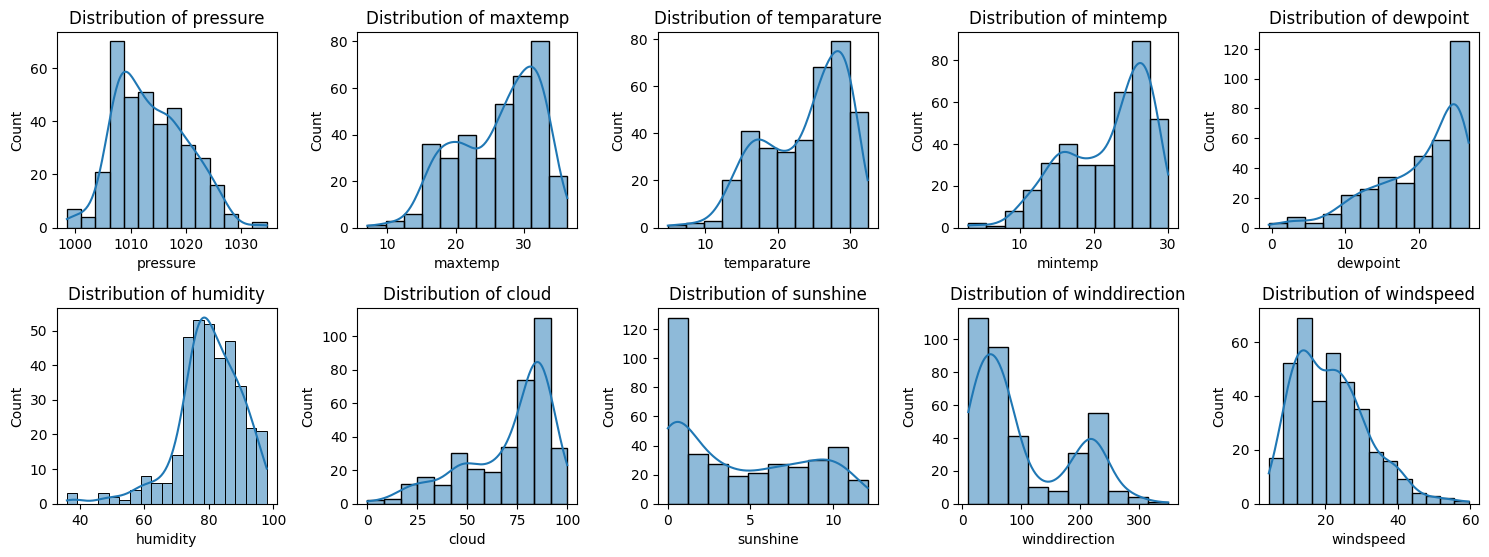

In [274]:
columns = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']

plt.figure(figsize=(15,8))

for i, col in enumerate(columns, 1):
    plt.subplot(3, 5, i)  # Adjust subplot grid to fit all columns
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")


plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Count of Rainfall')

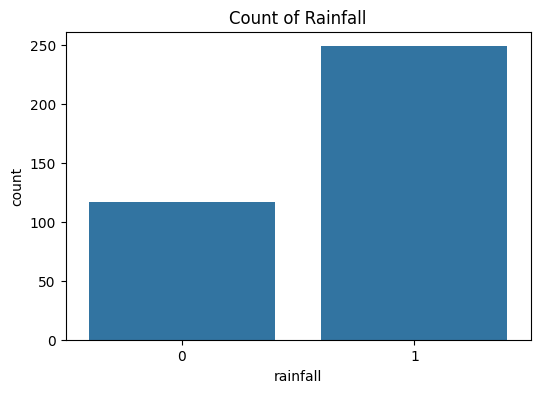

In [275]:
plt.figure(figsize=(6,4))
sns.countplot(x = "rainfall" , data = df)
plt.title("Count of Rainfall")

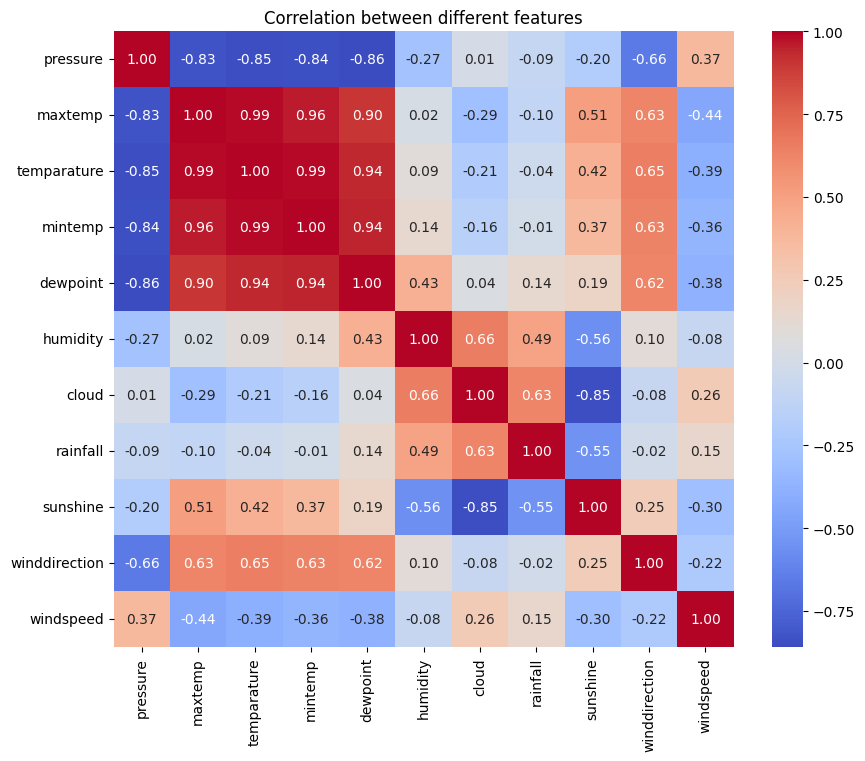

In [276]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm',fmt='.2f')
plt.title("Correlation between different features")
plt.show()

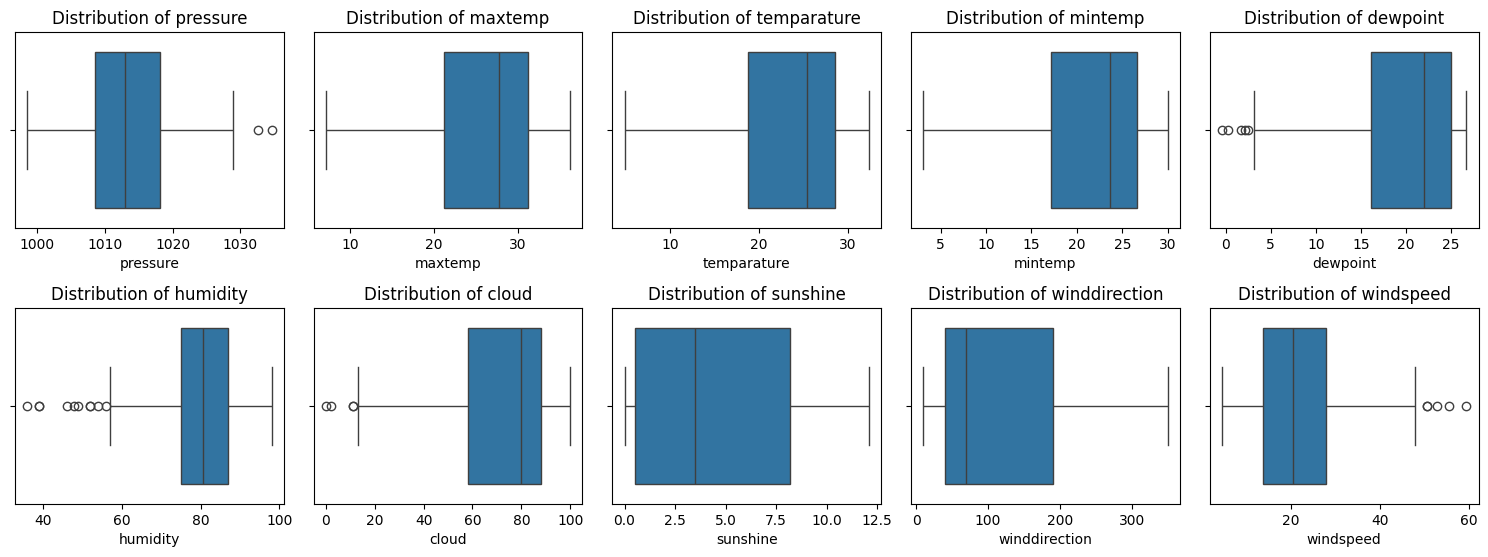

In [277]:
plt.figure(figsize=(15,8))

for i, col in enumerate(columns, 1):
    plt.subplot(3, 5, i)  # Adjust subplot grid to fit all columns
    sns.boxplot(x=df[col], orient='h')
    plt.title(f"Distribution of {col}")


plt.tight_layout()
plt.show()

In [278]:
for col in columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df.drop(df[df[col] < lower_bound].index,inplace=True)
    df.drop(df[df[col] > upper_bound].index,inplace=True)

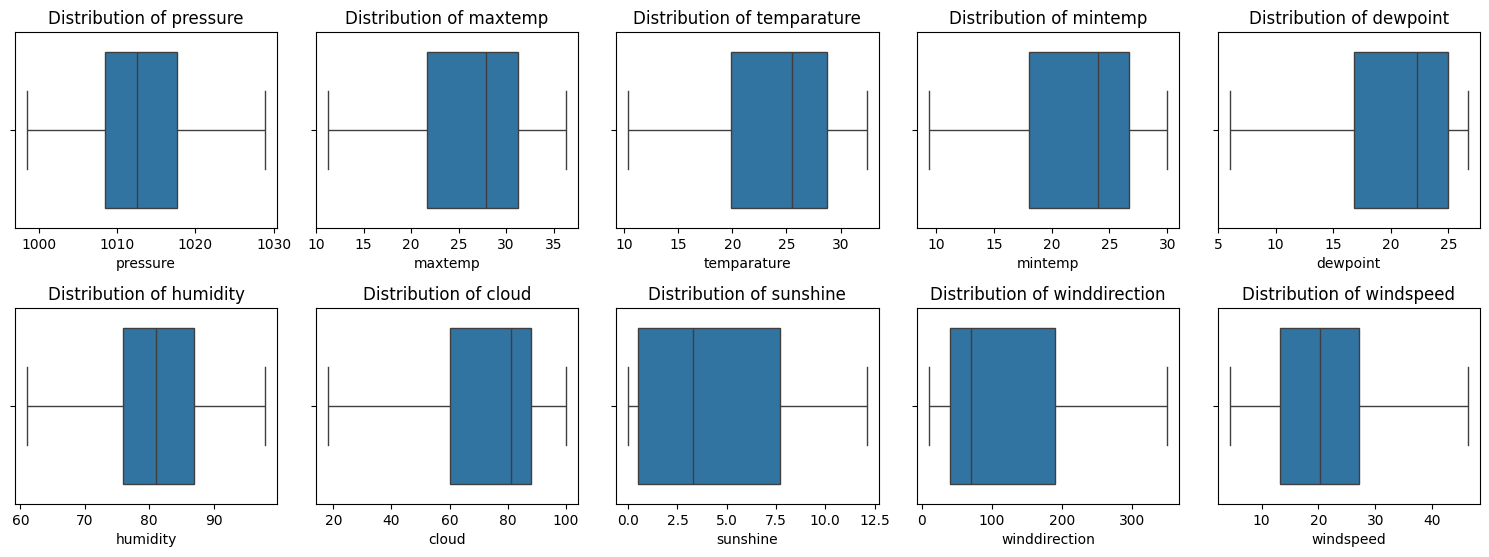

In [279]:
plt.figure(figsize=(15,8))

for i, col in enumerate(columns, 1):
    plt.subplot(3, 5, i)  # Adjust subplot grid to fit all columns
    sns.boxplot(x=df[col], orient='h')
    plt.title(f"Distribution of {col}")


plt.tight_layout()
plt.show()

In [280]:
df.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

In [281]:
df = df.drop(columns=['maxtemp', 'mintemp', 'dewpoint', 'sunshine'])
df.head()

,pressure,temparature,humidity,cloud,rainfall,winddirection,windspeed
0,1025.9,18.3,72,49,1,80.0,26.3
1,1022.0,18.9,81,83,1,50.0,15.3
2,1019.7,19.3,95,91,1,40.0,14.2
3,1018.9,20.6,90,88,1,50.0,16.9
4,1015.9,20.7,95,81,1,40.0,13.7


In [282]:
df.rainfall.value_counts()

rainfall
1    242
0    102
Name: count, dtype: int64

In [283]:
X = df.drop('rainfall',axis=1)
y = df['rainfall']

In [284]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=42)

In [285]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [286]:
smote = SMOTE(random_state=42)
X_train_resampled,y_train_resampled = smote.fit_resample(X_train_scaled,y_train)


print("Before SMOTE:"  , y_train.value_counts())
print("After SMOTE:"  , y_train_resampled.value_counts())


Before SMOTE: rainfall
1    190
0     85
Name: count, dtype: int64
After SMOTE: rainfall
1    190
0    190
Name: count, dtype: int64


In [287]:
param_lr = {
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],  
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [3000]
}


param_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': ['balanced', None]
}




In [288]:
lr = LogisticRegression(class_weight='balanced', random_state=42)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)


In [289]:
grid_lr = GridSearchCV(estimator=lr, param_grid=param_lr, cv=10, n_jobs=-1, scoring='f1_macro')
grid_rf = GridSearchCV(estimator=rf, param_grid=param_rf, cv=10, n_jobs=-1, scoring='f1_macro')


In [290]:
grid_lr.fit(X_train_resampled, y_train_resampled)
grid_rf.fit(X_train_resampled, y_train_resampled)


best_lr = grid_lr.best_estimator_
best_rf = grid_rf.best_estimator_

best_lr, best_rf

(LogisticRegression(C=0.1, class_weight='balanced', max_iter=3000, penalty='l1',
                    random_state=42, solver='liblinear'),
 RandomForestClassifier(class_weight='balanced', random_state=42))

In [291]:
best_lr.fit(X_train_resampled, y_train_resampled)
best_rf.fit(X_train_resampled, y_train_resampled)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [292]:
# Logistic Regression
y_pred_train_lr = best_lr.predict(X_train_scaled)
y_pred_test_lr = best_lr.predict(X_test_scaled)

print("Logistic Regression Train Accuracy:", accuracy_score(y_train, y_pred_train_lr))
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_test_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_test_lr))
print("Logistic Regression balanced_accuracy_score:", balanced_accuracy_score(y_test, y_pred_test_lr))
print("Logistic Regression ROC AUC Score:", roc_auc_score(y_test, y_pred_test_lr))
print("-------------------------------------------------------------------")
# Random Forest
y_pred_train_rf = best_rf.predict(X_train_scaled)
y_pred_test_rf = best_rf.predict(X_test_scaled)

print("Random Forest Train Accuracy:", accuracy_score(y_train, y_pred_train_rf))
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_test_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_test_rf))
print("Random Forest balanced_accuracy_score:", balanced_accuracy_score(y_test, y_pred_test_rf))
print("Random Forest ROC AUC Score:", roc_auc_score(y_test, y_pred_test_rf))


Logistic Regression Train Accuracy: 0.7781818181818182
Logistic Regression Test Accuracy: 0.8260869565217391
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.76      0.68        17
           1       0.92      0.85      0.88        52

    accuracy                           0.83        69
   macro avg       0.77      0.81      0.78        69
weighted avg       0.84      0.83      0.83        69

Logistic Regression balanced_accuracy_score: 0.8054298642533937
Logistic Regression ROC AUC Score: 0.8054298642533937
-------------------------------------------------------------------
Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.8115942028985508
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.82      0.68        17
           1       0.93      0.81      0.87        52

    accuracy                           0.81       

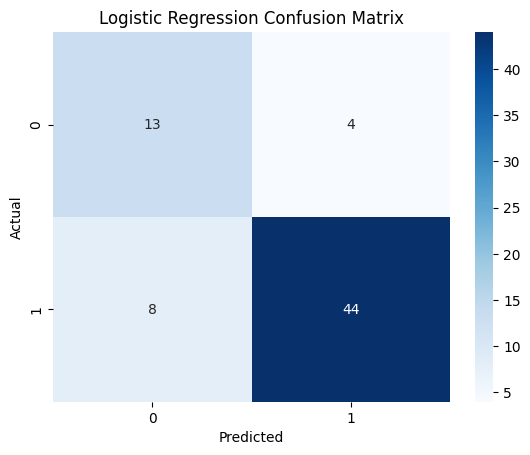

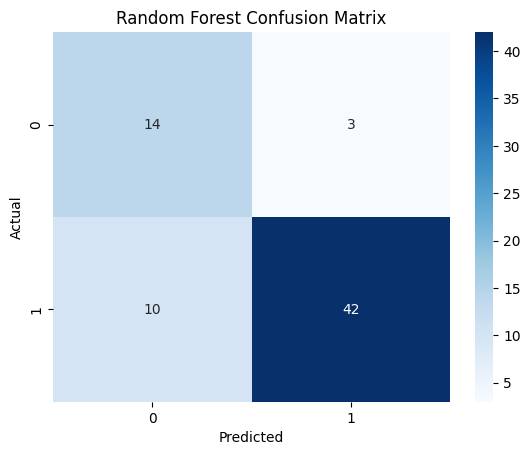

In [293]:
cm_lr = confusion_matrix(y_test, y_pred_test_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

cm_rf = confusion_matrix(y_test, y_pred_test_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [294]:
mlflow.set_experiment("Rainfall")
mlflow.set_tracking_uri(uri="http://localhost:5000")

with mlflow.start_run(run_name="Logistic Regression Model"):
    mlflow.log_param("model_type", "logistic_regression")
    mlflow.log_params(grid_lr.best_params_) 
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred_test_lr))
    mlflow.log_metric("precision", classification_report(y_test, y_pred_test_lr, output_dict=True)['1']['precision'])
    mlflow.log_metric("recall", classification_report(y_test, y_pred_test_lr, output_dict=True)['1']['recall'])
    mlflow.log_metric("f1_score", classification_report(y_test, y_pred_test_lr, output_dict=True)['1']['f1-score'])
    mlflow.sklearn.log_model(best_lr, "model", registered_model_name="LogisticRegressionModel")

with mlflow.start_run(run_name="Random Forest Model"):
    mlflow.log_param("model_type", "random_forest")
    mlflow.log_params(grid_rf.best_params_) 
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred_test_rf))
    mlflow.log_metric("precision", classification_report(y_test, y_pred_test_rf, output_dict=True)['1']['precision'])
    mlflow.log_metric("recall", classification_report(y_test, y_pred_test_rf, output_dict=True)['1']['recall'])
    mlflow.log_metric("f1_score", classification_report(y_test, y_pred_test_rf, output_dict=True)['1']['f1-score'])
    mlflow.sklearn.log_model(best_rf, "model", registered_model_name="RandomForestModel")


2025/08/25 12:01:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/25 12:01:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'LogisticRegressionModel' already exists. Creating a new version of this model...
2025/08/25 12:01:14 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LogisticRegressionModel, version 8
Created version '8' of model 'LogisticRegressionModel'.


🏃 View run Logistic Regression Model at: http://localhost:5000/#/experiments/994744866272056443/runs/c20d6a136be047d3a13f6bae0d506aab
🧪 View experiment at: http://localhost:5000/#/experiments/994744866272056443


2025/08/25 12:01:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/25 12:01:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'RandomForestModel' already exists. Creating a new version of this model...
2025/08/25 12:01:17 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RandomForestModel, version 8
Created version '8' of model 'RandomForestModel'.


🏃 View run Random Forest Model at: http://localhost:5000/#/experiments/994744866272056443/runs/a5d2af4044274515b463879c7f33d802
🧪 View experiment at: http://localhost:5000/#/experiments/994744866272056443


In [295]:
with open("logistic_model.pkl", "wb") as f:
    pickle.dump(best_lr, f)

In [296]:
with mlflow.start_run(run_name="Saved Model"):
        mlflow.log_artifact("logistic_model.pkl")


🏃 View run Saved Model at: http://localhost:5000/#/experiments/994744866272056443/runs/c6401f31d6d34702bbf0b4f2327de035
🧪 View experiment at: http://localhost:5000/#/experiments/994744866272056443
